In [3]:
###############################################
# Load some useful modules
###############################################

import os,sys

#for netcdf files
from netCDF4 import Dataset

#for numeric functions
import numpy as np
import numpy.ma as ma

#plotting functions
%matplotlib inline
import matplotlib.pyplot as plt
#from matplotlib.ticker import NullFormatter,MultipleLocator, FormatStrFormatter

# some tools to interpolate croco outputs vertically
import tools as to


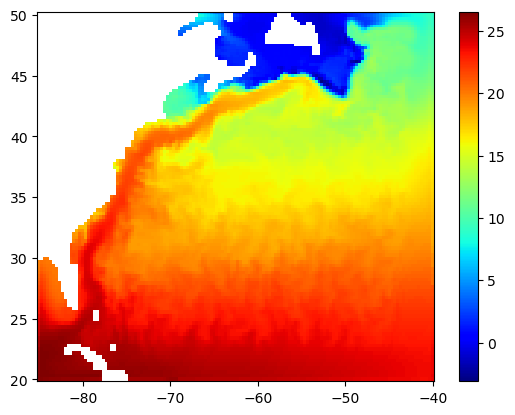

In [6]:


grdfile='CROCO_FILES/croco_grd.nc'
ncfile='CROCO_FILES/croco_his.nc'

#grdfile='/net/libra/local/tmp/1/gula/ROMS/roms_for_ModNum/1718/case8/basin_his.nc'
#ncfile='/net/libra/local/tmp/1/gula/ROMS/roms_for_ModNum/1718/case8/basin_his.nc'

#################################################
# Load data from grid file
#################################################



#open netcdf file
nc = Dataset(grdfile, 'a')

#Load a 4d variable (default coordinates order= t,z,y,x)
try:
    # for realistic cases
    lon=np.array(nc.variables['lon_rho'])
    lat=np.array(nc.variables['lat_rho'])
    mask=np.array(nc.variables['mask_rho'])
    mask[mask==0.] = np.nan
except:
    # for analytical ones
    lon=np.array(nc.variables['x_rho'])
    lat=np.array(nc.variables['y_rho'])
    mask=np.ones_like(lon)

    
#close netcdf file
nc.close()


#################################################
# Load data from netcdf file
#################################################


#open netcdf file
nc = Dataset(ncfile, 'r')

#Load SST at last time-step (default coordinates order= t,z,y,x)
temp=np.array(nc.variables['temp'][-1,-1,:,:]) * mask


#close netcdf file
nc.close()


#################################################
# Plot  data
#################################################

# Create a contour plot with 100 levels
plt.pcolormesh(lon,lat,ma.masked_invalid(temp),cmap=plt.cm.jet); 

# plot colorbar
plt.colorbar()

# Save it as a .png file
plt.savefig( 'image.png',   dpi=200); 

# Show figure
plt.show()



In [7]:
###################################################################################
#Load variables and parameters 
###################################################################################

nc = Dataset(ncfile, 'r')

temp3d=np.array(nc.variables['temp'][-1,:,:,:])

#Load some variables and parameters
zeta=nc.variables['zeta'][-1,:,:]
topo=nc.variables['h'][:]
pm=nc.variables['pm'][:]
pn=nc.variables['pn'][:]
hc = nc.hc
Cs_r = nc.Cs_r
Cs_w = nc.Cs_w

#close netcdf file
nc.close()

###################################################################################
#Compute vertical coordinates 
###################################################################################

(z_r,z_w) =  to.zlevs(topo,zeta, hc, Cs_r, Cs_w)

###################################################################################
#Interpolate a variable on a given depth
###################################################################################

t400 = to.vinterp(temp3d,z_r,-400,topo=topo,cubic=1)


cubic interpolation


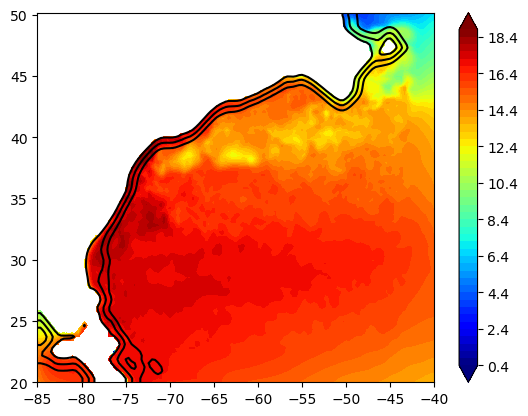

In [10]:
#################################################
# Plot  data
#################################################

# Create a contour plot with 100 levels
plt.contourf(lon,lat,t400,50,cmap=plt.cm.jet,extend='both'); 
plt.colorbar()

# plot topography contours
plt.contour(lon,lat,topo,[500,1000,2000,5000],colors='k'); 

# Save it as a .png file
#plt.savefig( 'image.png',  magnification='auto',bbox_inches='tight', dpi=300); 

# Show figure
plt.show()

/tmp/ipykernel_1848310/3337841454.py:24: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(x[:,j,:],z_r[:,j,:],temp3d[:,1,:],cmap=plt.cm.jet);plt.colorbar()


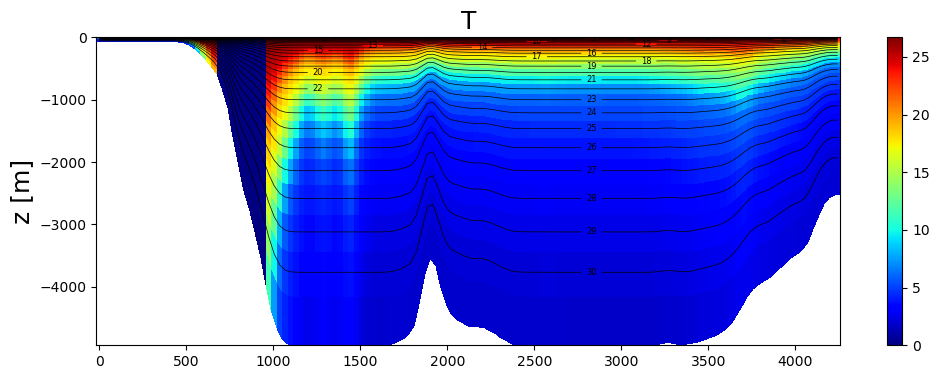

In [11]:
###################################################################################
#Compute vertical coordinates 
###################################################################################


# Generate z, y, x grids using mgrid
z, y, x = np.mgrid[:z_r.shape[0], :z_r.shape[1], :z_r.shape[2]]

# Scale to kilometers
x = (x / pm).astype(float) * 1e-3  

# Pick a y-index for plotting
j = 40

#################################################
# Plot  data
#################################################

fig = plt.figure(figsize=(12.0,4.0)) 

###################

ax1 = plt.subplot(1,1,1);
plt.pcolormesh(x[:,j,:],z_r[:,j,:],temp3d[:,1,:],cmap=plt.cm.jet);plt.colorbar()

CS1 = plt.contour(x[:,j,:],z_r[:,j,:],np.max(z) - z[:,j,:],range(100),colors = ('k',), linewidths = (0.5,)); 
plt.clabel(CS1, fmt = '%2.0f', colors = 'k', fontsize=6)  ; 

plt.ylabel(r'x [km]',fontsize=18); plt.ylabel(r'z [m]',fontsize=18)

plt.title(r'T', fontsize=18)

# Save it as a .png file
#plt.savefig( 'image.png',  magnification='auto',bbox_inches='tight', dpi=300); 

# Show figure
plt.show()

#################################################
